C:\Users\hzamanis\AppData\Local\Temp\ipykernel_35648\3656203695.py:33: RuntimeWarning: overflow encountered in double_scalars
  F = beta * rho * np.abs(v_old[i]) * v_old[i]
C:\Users\hzamanis\AppData\Local\Temp\ipykernel_35648\3656203695.py:35: RuntimeWarning: invalid value encountered in double_scalars
  v[i] = v_old[i] + dt * (dpdx / mu - (mu / k) * v_old[i] - F / rho)
C:\Users\hzamanis\AppData\Local\Temp\ipykernel_35648\3656203695.py:31: RuntimeWarning: invalid value encountered in double_scalars
  dvdx = (v_old[i+1] - v_old[i-1]) / (2*dx)


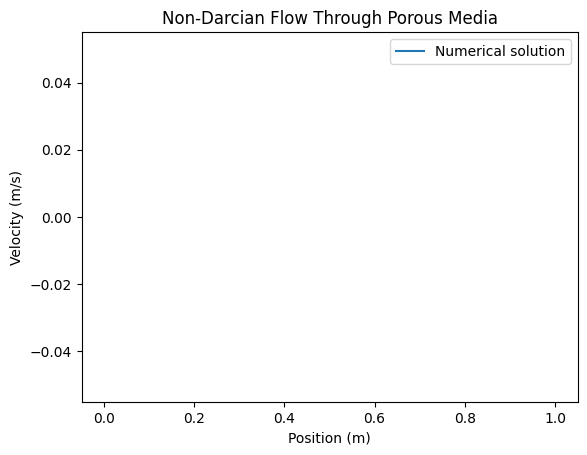

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
L = 1.0  # Length of the domain (m)
N = 100  # Number of grid points
dx = L / (N - 1)  # Grid spacing (m)
mu = 1.0e-3  # Dynamic viscosity (Pa.s)
k = 1.0e-12  # Permeability (m^2)
beta = 1.0e3  # Forchheimer coefficient (1/m)
rho = 1000.0  # Density (kg/m^3)
dpdx = -100.0  # Pressure gradient (Pa/m)

# Initialize velocity array
v = np.ones(N) * 1e-5  # Small initial velocity to avoid division by zero

# Boundary conditions
v[0] = 0.0  # Velocity at the left boundary
v[-1] = 0.0  # Velocity at the right boundary

# Time-stepping parameters
dt = 1.0e-6  # Time step (s)
t_end = 0.1  # End time (s)
nt = int(t_end / dt)  # Number of time steps
####
# Time-stepping loop
for t in range(nt):
    v_old = v.copy()
    for i in range(1, N-1):
        # Central difference for velocity
        dvdx = (v_old[i+1] - v_old[i-1]) / (2*dx)
        # Forchheimer term
        F = beta * rho * np.abs(v_old[i]) * v_old[i]
        # Update velocity using explicit scheme
        v[i] = v_old[i] + dt * (dpdx / mu - (mu / k) * v_old[i] - F / rho)

# Plot results
x = np.linspace(0, L, N)
plt.plot(x, v, label='Numerical solution')
plt.xlabel('Position (m)')
plt.ylabel('Velocity (m/s)')
plt.title('Non-Darcian Flow Through Porous Media')
plt.legend()
plt.show()
